In [331]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.linear_model import LinearRegression as lm
from sklearn.ensemble import GradientBoostingClassifier as gbc
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
#from working_funcs import rotate_x, rotate_both, to_perc_neg, to_perc
import plotly.express as px
import plotly.graph_objects as go
from plotnine import ggplot, geom_jitter, aes, geom_point, geom_boxplot, geom_histogram, geom_col, labs, facet_wrap, theme, geom_text, element_text, element_blank, geom_vline, geom_hline

In [332]:
## Read in the data 

df = pd.read_csv("train.csv", sep=",")

In [333]:
df.columns

Index(['class', 'cap.shape', 'cap.surface', 'cap.color', 'bruises', 'odor',
       'gill.attachment', 'gill.spacing', 'gill.size', 'gill.color',
       'stalk.shape', 'stalk.root', 'stalk.surface.above.ring',
       'stalk.surface.below.ring', 'stalk.color.above.ring',
       'stalk.color.below.ring', 'veil.type', 'veil.color', 'ring.number',
       'ring.type', 'spore.print.color', 'population', 'habitat'],
      dtype='object')

In [334]:
df.isnull().sum()

class                         0
cap.shape                     0
cap.surface                   0
cap.color                     0
bruises                       0
odor                          0
gill.attachment             155
gill.spacing                  0
gill.size                     0
gill.color                    0
stalk.shape                   0
stalk.root                    0
stalk.surface.above.ring      0
stalk.surface.below.ring      0
stalk.color.above.ring        0
stalk.color.below.ring        0
veil.type                     0
veil.color                    0
ring.number                   0
ring.type                     0
spore.print.color             0
population                    0
habitat                       0
dtype: int64

In [335]:
df.head()

,class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,...,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.type,veil.color,ring.number,ring.type,spore.print.color,population,habitat
0,p,x,s,n,True,p,False,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,b,s,w,True,l,False,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,True,p,False,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,False,n,False,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,True,a,False,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [336]:
df.items()

<generator object DataFrame.items at 0x1a22f5e850>

In [197]:
## The data is categorial so I convert it with LabelEncoder to transfer to ordinal.

labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [198]:
df.describe()

,class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,...,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.type,veil.color,ring.number,ring.type,spore.print.color,population,habitat
count,6093.000000,6093.000000,6093.000000,6093.00000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,...,6093.000000,6093.000000,6093.000000,6093.0,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000
mean,0.482029,3.356311,1.828984,4.49762,0.414902,4.117840,0.025439,0.162153,0.306910,4.818152,...,1.603315,5.812572,5.797637,0.0,1.966191,1.068439,2.297555,3.569506,3.637453,1.514525
std,0.499718,1.606855,1.230615,2.54781,0.492746,2.093254,0.157467,0.368622,0.461249,3.538470,...,0.676766,1.918991,1.916489,0.0,0.240729,0.268278,1.798789,2.379734,1.257031,1.719780
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.00000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.00000,0.000000,5.000000,0.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.00000,1.000000,5.000000,0.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.00000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [300]:
df.head(10)

,class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,...,stalk.surface.above.ring,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.color,ring.number,ring.type,spore.print.color,population,habitat
0,1,5,2,4,1,6,0,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,0,2,8,1,3,0,0,0,5,...,2,2,7,7,2,1,4,3,2,3
2,1,5,3,8,1,6,0,0,1,5,...,2,2,7,7,2,1,4,2,3,5
3,0,5,2,3,0,5,0,1,0,4,...,2,2,7,7,2,1,0,3,0,1
4,0,5,3,9,1,0,0,0,0,5,...,2,2,7,7,2,1,4,2,2,1
5,0,0,2,8,1,0,0,0,0,2,...,2,2,7,7,2,1,4,2,2,3
6,1,5,3,8,1,6,0,0,1,7,...,2,2,7,7,2,1,4,2,4,1
7,0,5,3,9,1,3,0,0,0,2,...,2,2,7,7,2,1,4,3,2,1
8,0,0,2,9,1,0,0,0,0,10,...,2,2,7,7,2,1,4,3,3,1
9,0,4,0,3,0,5,0,0,1,4,...,2,2,7,7,2,1,4,3,5,5


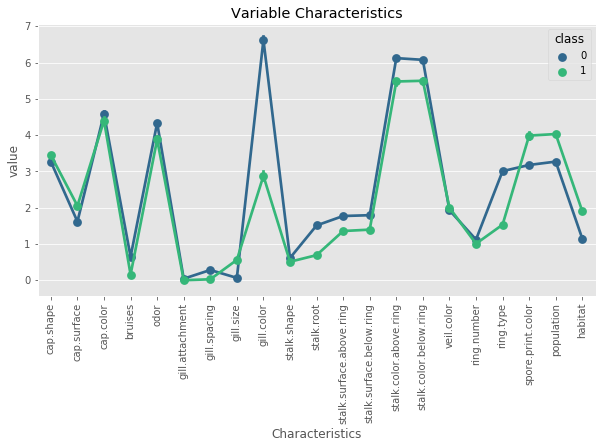

In [271]:
#### ----  VISUALISING PREDICTED VERSUS ACTUAL FLOOR ---- ####

plt.style.use('ggplot')
df_div = pd.melt(df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.pointplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'viridis')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));
plt.title("Variable Characteristics")
plt.rcParams["figure.figsize"] = (10,5)

## There is an interesting deviation in gill colour for 0 and 1. Much higher value for poisonous
## Might need to remove Gill Attach, Spacing and Size - check again later

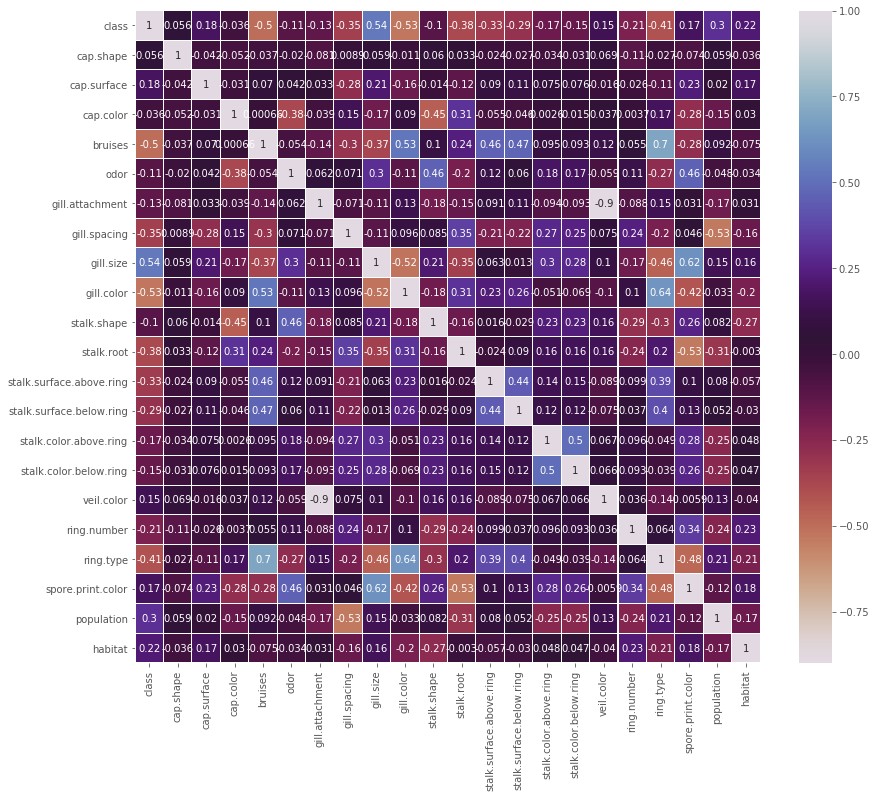

In [272]:
## Here I am running a correlation matrix over the entire dataset to see which variables are most iomportant

plt.style.use('ggplot')
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.01,cmap = "twilight_r", annot=True)
plt.yticks(rotation=0);


## Again this confirms the above suspiciion that Gill Colour is very important.

## Below we will Look deeper at Gill Color and Ring Type - both have very strong neg correlations

In [273]:
## Diving deeper into important variables - time constrained so will not complete this. Quickly move onto modelling 

In [274]:
## Let's create a set of new dataframes to examime relationships a bit more closely

gc_group = df[['class', 'gill.color']].groupby(['gill.color']).mean().sort_values(by='class', ascending=False)
rt_group = df[['class', 'ring.type']].groupby(['ring.type']).mean().sort_values(by='class', ascending=False)
sr_group = df[['class', 'stalk.root']].groupby(['stalk.root']).mean().sort_values(by='class', ascending=False)


/Applications/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



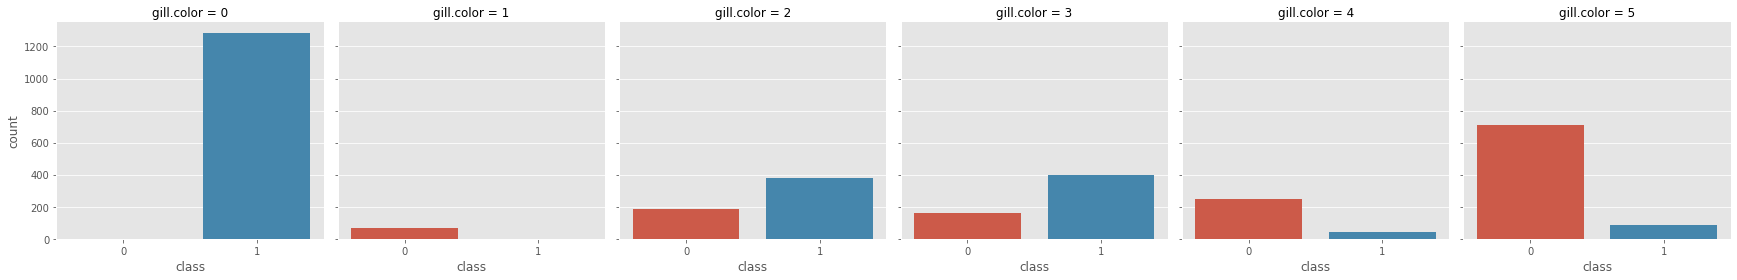

In [275]:
## Most important variable is Gill Color - let's make a new dataframe and look at important breakpoints where it influences 1 (poisonous) or 0 (edible)

'''
class
gill.color	
0	1.000000
8	1.000000
3	0.711744
2	0.669596
7	0.438830

'''
## Subset 1 - let's look at all gill color data below or equal 4 - much more predictive of class 1 
data = df[['class', 'gill.color']]
gcdown_data = data[data['gill.color']<=5]
sns.factorplot('class', col="gill.color", kind="count", data=gcdown_data,
              size=4, aspect=1, col_wrap=6)

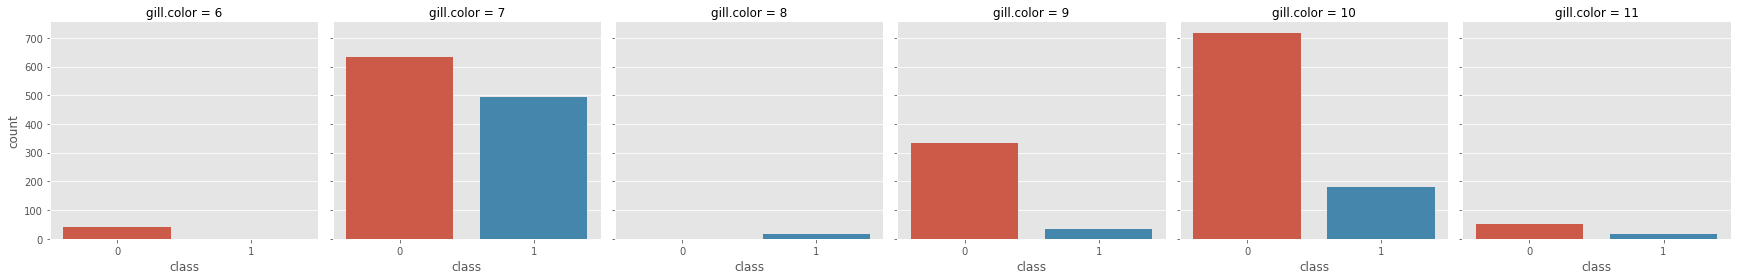

In [276]:
## Most important variable is Gill Color - let's make a new dataframe and look at important breakpoints where it influences 1 (poisonous) or 0 (edible)

'''
class
ring.type	
2	1.000000
3	1.000000
0	0.635220
4	0.206711
1	0.000000

'''
## Subset 1 - let's look at all gill color data above 4 - much more predictive of Class 0 

data = df[['class', 'gill.color']]
gcup_data = data[data['gill.color']>5]
sns.factorplot('class', col="gill.color", kind="count", data=gcup_data,
              size=4, aspect=1, col_wrap=6)

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3695: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



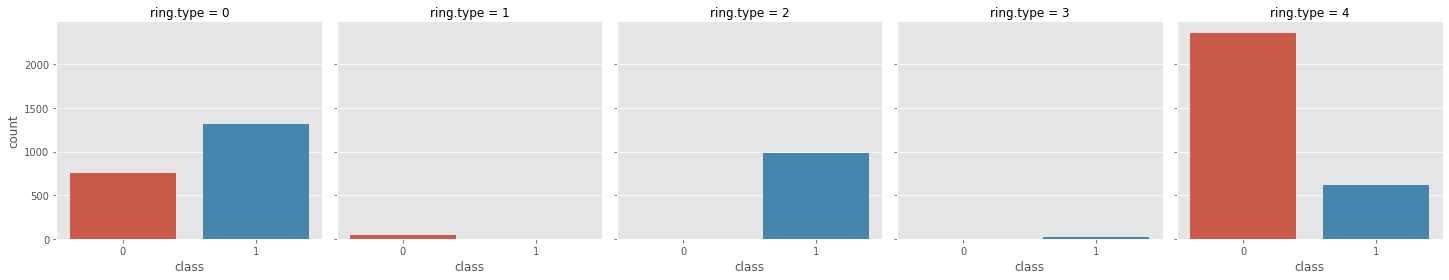

In [277]:
## Next important variable is Ring Type - let's make a new dataframe and look at important breakpoints where it influences 1 (poisonous) or 0 (edible)
'''
class
ring.type	
2	1.000000
3	1.000000
0	0.635220
4	0.206711
1	0.000000

'''

## Subset 1 - Ring Type 0 seems to balance relatively evenly, but ring type 4 strongly towards class 0 
data = df[['class', 'ring.type']]
rt_data = data[data['ring.type']<=10]
sns.catplot('class', col="ring.type", kind="count",data=rt_data,
           size=4, aspect=1, col_wrap=5)


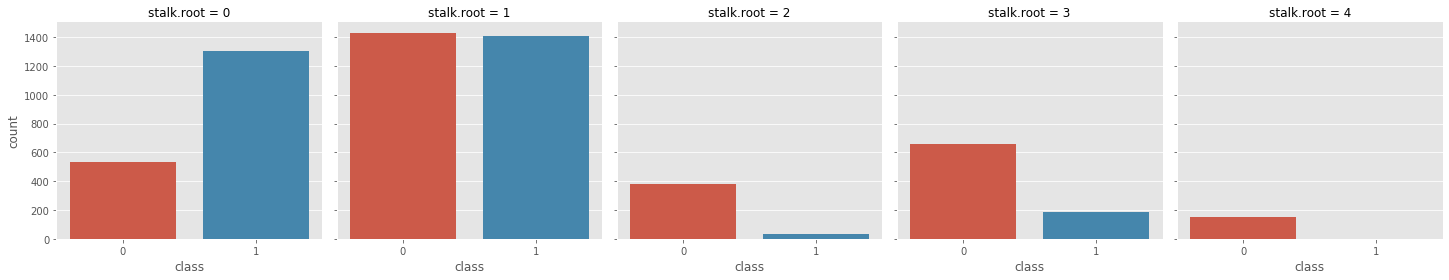

In [278]:
## Third important variable is Stalk Root - let's make a new dataframe and look at important breakpoints where it influences 1 (poisonous) or 2 (edible)

'''
class
stalk.root	
0	0.710169
1	0.496129
3	0.223404
2	0.077295
4	0.000000
'''

## Subset 1 - Stalk Root seems to balance towards predicting in favour of 0 but not definitive. Let's see what the models tell us
data = df[['class', 'stalk.root']]
sr_data = data[data['stalk.root']<=10]
sns.catplot('class', col="stalk.root", kind="count", data=sr_data, 
            size=4, aspect=1, col_wrap=5)

In [279]:
#### ---- PREPROCESSING AND SPLITTING THE DATA - ITERATION 1 ---- ###

In [280]:
X=df.drop(['class'], axis=1) ## All information except class used to predict outcomes at the start - may refine this later
y=df['class'] ## Select 'class' as our target label

In [281]:
## Here I am splitting training and test sets

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)

In [338]:
## Here I am appling standard scaling to make sure there is a consistent scale to work with

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [339]:
#### ----  MODEL ITERATION 1: DECISION TREE ---- ####

from sklearn.tree import DecisionTreeClassifier

## Apply Fit method to training data
clf = DecisionTreeClassifier(criterion = 'gini', splitter = 'random', min_samples_split = 2, max_depth = 5,random_state= 42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='random')

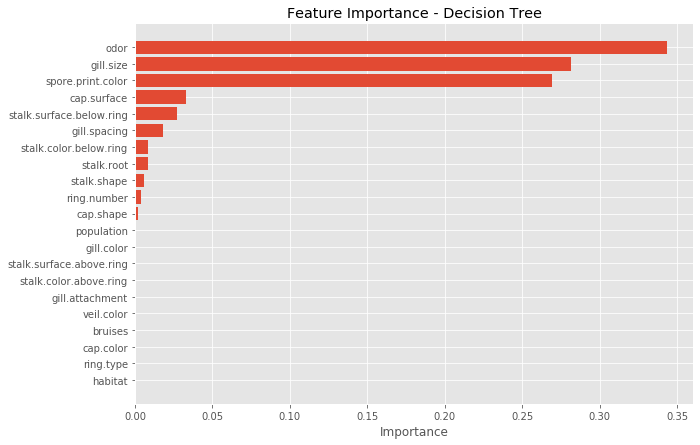

In [340]:
### --- Let's look at Feature Importance for a further iteration of the data

features_list = X.columns.values
feature_importance = clf.feature_importances_
sorted_index = np.argsort(feature_importance)

plt.figure(figsize=(10,7))
plt.barh(range(len(sorted_index)), feature_importance[sorted_index])
plt.yticks(range(len(sorted_index)), features_list[sorted_index])
plt.xlabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.draw()
plt.show()

## The preliminary conclusion from this is that there are 11 features that have an effect and perhaps 
## maximum 5 features that have any importance

In [341]:
## Let's plot the fitted data onto the target test data for a prediction

## Predicting the test set results

y_pred_dt = clf.predict(X_test)

In [342]:
print("Error Report for Naive Bayes Model \n\n", classification_report(y_test, y_pred_dt))


Error Report for Naive Bayes Model 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       646
           1       1.00      1.00      1.00       573

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [343]:
cm = confusion_matrix(y_test, y_pred_dt)
cm

array([[646,   0],
       [  1, 572]])

In [344]:
## Some notes on how to interpret the Condusion Matrix:
'''
1. True Positives (TP): True positives are the cases when the actual class of the data point was 1(True) and the predicted is also 1(True)
Ex: The case where a person is actually having cancer(1) and the model classifying his case as cancer(1) comes under True positive.

2. True Negatives (TN): True negatives are the cases when the actual class of the data point was 0(False) and the predicted is also 0(False

3. False Positives (FP): False positives are the cases when the actual class of the data point was 0(False) and the predicted is 1(True). 
False is because the model has predicted incorrectly and positive because the class predicted was a positive one. (1)

4. False Negatives (FN): False negatives are the cases when the actual class of the data point was 1(True) and the predicted is 0(False). False 
is because the model has predicted incorrectly and negative because the class predicted was a negative one. (0)

How to apply in in the Mushroom Case:

In our dataset we have dummified the data and so Poisonous = 1 and Edible = 0.
We want to make sure that we minimise the false negatives on the 1 dimension of the Confusion Matrix. 
Bascially we need to ensure that we classify poisonous mushrooms as poisonous 100% of the time. If we classify edible mushrooms as poisonous that is not a
real issue as there is not harm. 

'''

'\n1. True Positives (TP): True positives are the cases when the actual class of the data point was 1(True) and the predicted is also 1(True)\nEx: The case where a person is actually having cancer(1) and the model classifying his case as cancer(1) comes under True positive.\n\n2. True Negatives (TN): True negatives are the cases when the actual class of the data point was 0(False) and the predicted is also 0(False\n\n3. False Positives (FP): False positives are the cases when the actual class of the data point was 0(False) and the predicted is 1(True). \nFalse is because the model has predicted incorrectly and positive because the class predicted was a positive one. (1)\n\n4. False Negatives (FN): False negatives are the cases when the actual class of the data point was 1(True) and the predicted is 0(False). False \nis because the model has predicted incorrectly and negative because the class predicted was a negative one. (0)\n\nHow to apply in in the Mushroom Case:\n\nIn our dataset w

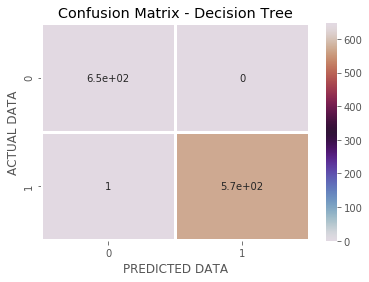

In [345]:
## Visualising the Confusion Matrix

cm =confusion_matrix(y_test, y_pred_dt)

sns.heatmap(cm, annot = True,  linewidths=2, cmap = 'twilight')
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('ACTUAL DATA')
plt.xlabel('PREDICTED DATA');

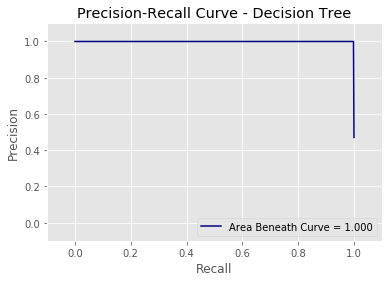

In [346]:
## Visualising the Precision Recall Curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_dt)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Beneath Curve = %0.3f'% area, color="navy")
plt.legend(loc = 'lower right')
plt.title('Precision-Recall Curve - Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
plt.show()

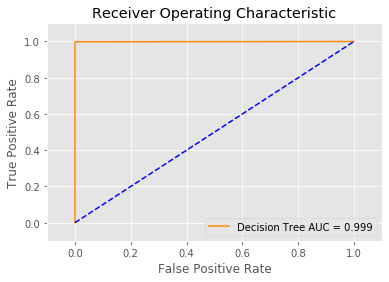

In [347]:
### Creating a Function to Plot the ROC curve

def roc_curve_acc(y_test, y_pred_dt,method):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_dt)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange',label='%s AUC = %0.3f'%(method, roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.ylim([-0.1, 1.1])
    plt.xlim([-0.1, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

roc_curve_acc(y_test, y_pred_dt, "Decision Tree")

In [348]:
#### ----  MODEL ITERATION 2: GAUSSIAN NAIVE BAYES MODEL ---- ####

In [349]:
from sklearn.naive_bayes import GaussianNB

clf_bayes = GaussianNB()
clf_bayes = clf_bayes.fit(X_train, y_train)

In [350]:
y_pred_bayes = clf_bayes.predict(X_test)

In [351]:
cm = confusion_matrix(y_test, y_pred_bayes)
cm

array([[596,  50],
       [ 48, 525]])

Text(0.5, 15.0, 'PREDICTED LABEL')

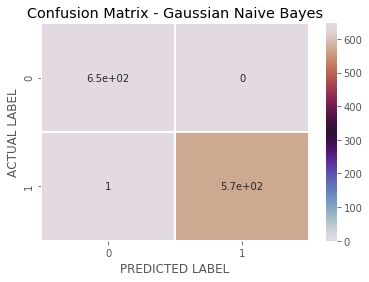

In [352]:
## Visualising the Confusion Matrix

cm =confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot = True,  linewidths=.5, cmap='twilight')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.ylabel('ACTUAL LABEL')
plt.xlabel('PREDICTED LABEL')

In [353]:
print("Error Report for Naive Bayes Model \n\n", classification_report(y_test, y_pred_bayes))

Error Report for Naive Bayes Model 

               precision    recall  f1-score   support

           0       0.93      0.92      0.92       646
           1       0.91      0.92      0.91       573

    accuracy                           0.92      1219
   macro avg       0.92      0.92      0.92      1219
weighted avg       0.92      0.92      0.92      1219



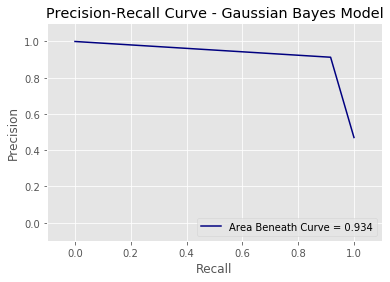

In [354]:
### Building a Precision Recall Curve visualisati

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_bayes)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Beneath Curve = %0.3f'% area, color="navy")
plt.legend(loc = 'lower right')
plt.title('Precision-Recall Curve - Gaussian Bayes Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
plt.show()

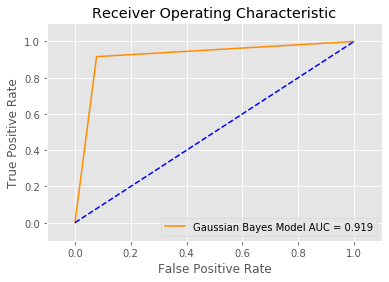

In [355]:
### Creating a Function to Plot the ROC curve

def roc_curve_acc(y_test, y_pred_bayes,method):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_bayes)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange',label='%s AUC = %0.3f'%(method, roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.ylim([-0.1, 1.1])
    plt.xlim([-0.1, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

roc_curve_acc(y_test, y_pred_bayes, "Gaussian Bayes Model")

In [356]:
#### ----  MODEL ITERATION 3: RANDOM FOREST CLASSIFICATION ---- ####

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Apply Fit mathod to training data

rf_clf = RandomForestClassifier(n_estimators=50,
                                criterion = 'gini', 
                                max_depth = 2, 
                                bootstrap = False, 
                                min_samples_split = 4, 
                                #max_features = "auto",
                                )
rf_clf.fit(X_train, y_train)

## Apply Predict Function to test data
y_pred_rf = rf_clf.predict(X_test)

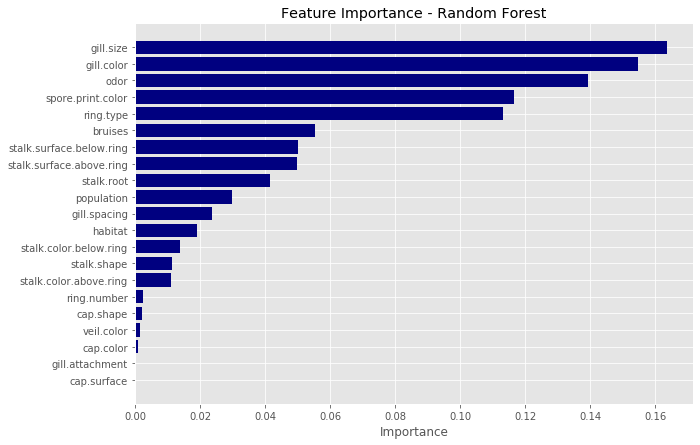

In [357]:
### --- Let's look at Feature Importance for Random Forest

features_list = X.columns.values
feature_importance = rf_clf.feature_importances_
sorted_index = np.argsort(feature_importance) 

plt.figure(figsize=(10,7))
plt.barh(range(len(sorted_index)), feature_importance[sorted_index], color='navy')
plt.yticks(range(len(sorted_index)), features_list[sorted_index])
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.draw()
plt.show()

## The preliminary conclusion from this is that there are 11 features that have an effect and perhaps 
## maximum 5 features that have any importance

In [358]:
print("Error Report for Random Forest Model: \n\n", classification_report(y_test, y_pred_rf))

Error Report for Random Forest Model: 

               precision    recall  f1-score   support

           0       0.92      0.98      0.95       646
           1       0.98      0.90      0.94       573

    accuracy                           0.95      1219
   macro avg       0.95      0.94      0.94      1219
weighted avg       0.95      0.95      0.94      1219



In [359]:
## Confusion Matrix

cm =confusion_matrix(y_test, y_pred_rf)
cm

array([[636,  10],
       [ 57, 516]])

Text(0.5, 15.0, 'PREDICTED LABEL')

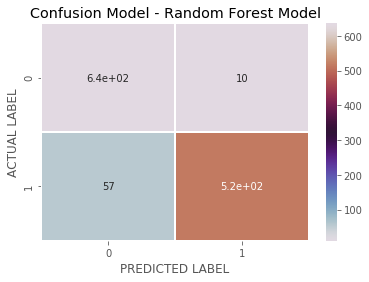

In [360]:
## Visualising the Confusion Matrix

cm =confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True,  linewidths=.5, cmap="twilight")
plt.title('Confusion Model - Random Forest Model')
plt.ylabel('ACTUAL LABEL')
plt.xlabel('PREDICTED LABEL')

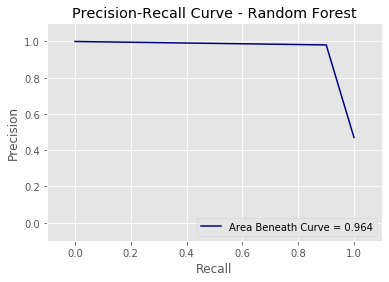

In [361]:
## Visualising the Precision Recall Curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Beneath Curve = %0.3f'% area, color="navy")
plt.legend(loc = 'lower right')
plt.title('Precision-Recall Curve - Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
plt.show()

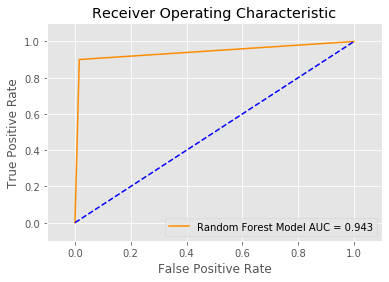

In [362]:
### Creating a Function to Plot the ROC curve

def roc_curve_acc(y_test, y_pred_rf, method):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rf)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange',label='%s AUC = %0.3f'%(method, roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.ylim([-0.1, 1.1])
    plt.xlim([-0.1, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

roc_curve_acc(y_test, y_pred_rf, "Random Forest Model")

In [363]:
#### ----  OTHER MODELS : TRYING OUT A SET OF OTHER MODELS TO SEE RESULTS ---- ####

In [364]:
#### ----  MODEL ITERATION 4: K Nearest Neighbour ---- ####

In [365]:
## Creating a manual iterator and for loop for the K Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier
optimal_knn = 0
optimal_score = 0
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    if knn.score(X_test,y_test) > optimal_score:
        optimal_score = knn.score(X_train,y_train)
        optimal_knn = i

In [366]:
## Looking at Test Accuracy
print("""Best KNN Value: {}
Test Accuracy: {}%""".format(optimal_knn, round(optimal_score*100,2)))

Best KNN Value: 1
Test Accuracy: 100.0%


In [367]:
## Applying Fitted Data to Prediction
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([1, 0, 1, ..., 1, 1, 0])

In [368]:
## Looking at Error Metrics / Classification Reports
print("Error Report for KNN \n\n", classification_report(y_test, y_pred_KNN))

Error Report for KNN 

               precision    recall  f1-score   support

           0       0.50      0.52      0.51       646
           1       0.44      0.42      0.43       573

    accuracy                           0.47      1219
   macro avg       0.47      0.47      0.47      1219
weighted avg       0.47      0.47      0.47      1219



In [369]:
##Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
cm

array([[631,  15],
       [ 25, 548]])

Text(0.5, 15.0, 'PREDICTED LABEL')

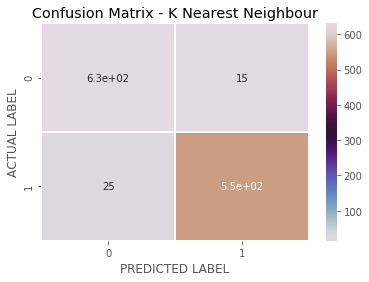

In [370]:
##Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot = True,  linewidths=.5, cmap='twilight')
plt.title('Confusion Matrix - K Nearest Neighbour')
plt.ylabel('ACTUAL LABEL')
plt.xlabel('PREDICTED LABEL')

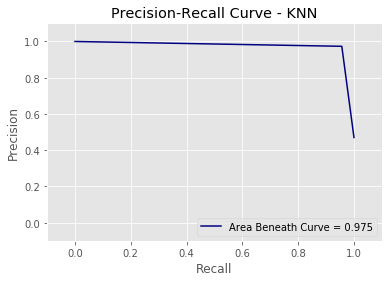

In [371]:
## Visualising the Precision Recall Curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_knn)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Beneath Curve = %0.3f'% area, color="navy")
plt.legend(loc = 'lower right')
plt.title('Precision-Recall Curve - KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
plt.show()

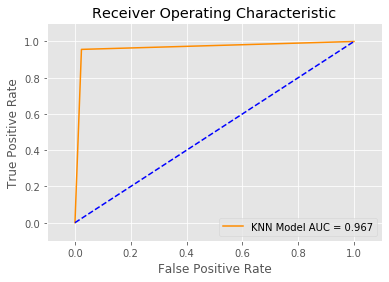

In [372]:
### Creating a Function to Plot the ROC curve

def roc_curve_acc(y_test, y_pred_knn,method):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_knn)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange',label='%s AUC = %0.3f'%(method, roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.ylim([-0.1, 1.1])
    plt.xlim([-0.1, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

roc_curve_acc(y_test, y_pred_knn, "KNN Model")

In [373]:
## Alternative Option 2 - Logistic Regression

In [374]:
# Running a Linear Model - Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0, fit_intercept=True, random_state=42, max_iter=150)
lr.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [375]:
## Look at Test Accuracy
print("Test Accuracy: {}%".format(round(lr.score(X_test,y_test)*100,2)))

Test Accuracy: 95.08%


In [376]:
## Applying Fitted Data to Prediction
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([1, 0, 1, ..., 1, 1, 0])

In [377]:
## Looking at Error Metrics / Classification Reports
print("Error Report for Logistic Regression \n\n", classification_report(y_test, y_pred_lr))

Error Report for Logistic Regression 

               precision    recall  f1-score   support

           0       0.94      0.97      0.95       646
           1       0.96      0.93      0.95       573

    accuracy                           0.95      1219
   macro avg       0.95      0.95      0.95      1219
weighted avg       0.95      0.95      0.95      1219



In [378]:
##Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
cm

array([[625,  21],
       [ 39, 534]])

Text(0.5, 15.0, 'PREDICTED LABEL')

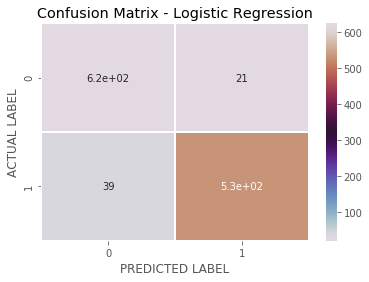

In [379]:
##Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot = True,  linewidths=.5, cmap='twilight')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('ACTUAL LABEL')
plt.xlabel('PREDICTED LABEL')

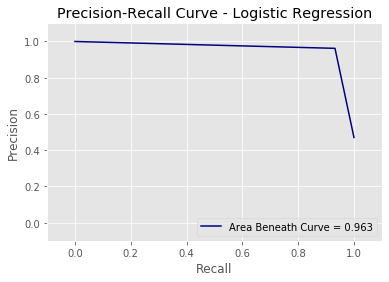

In [380]:
## Visualising the Precision Recall Curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_lr)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Beneath Curve = %0.3f'% area, color="navy")
plt.legend(loc = 'lower right')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
plt.show()

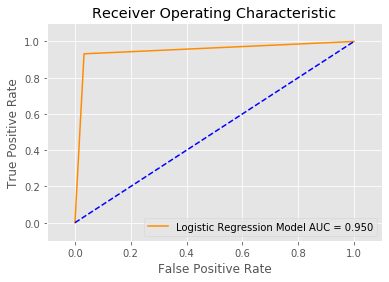

In [381]:
### Creating a Function to Plot the ROC curve

def roc_curve_acc(y_test, y_pred_lr,method):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_lr)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange',label='%s AUC = %0.3f'%(method, roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.ylim([-0.1, 1.1])
    plt.xlim([-0.1, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

roc_curve_acc(y_test, y_pred_lr, "Logistic Regression Model")